## WEEK 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_csv("clean_indian_kids_screen_time.csv")

# Cohort: Age Band × Device Category (Average Screen Time)
pivot1 = df.pivot_table(index="Age_Band", columns="Device_Category",
                        values="Avg_Daily_Screen_Time_hr", aggfunc="mean")
plt.figure(figsize=(8,5))
sns.heatmap(pivot1, annot=True, cmap="plasma", fmt=".2f")
plt.title("Average Screen Time by Age Band and Device Category", fontsize=13, fontweight='bold')
plt.xlabel("Device Category")
plt.ylabel("Age Band")
plt.show()

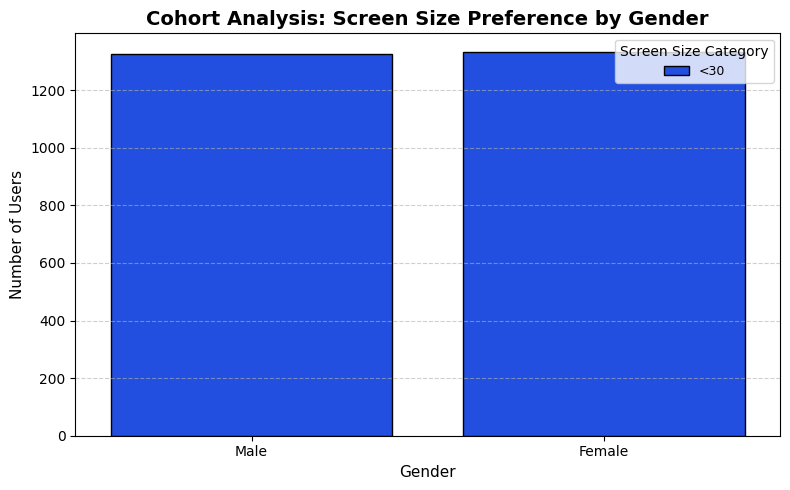

In [ ]:
# Cohort Analysis: Screen Size Preference by Gender
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x="Gender",
    hue="Device_Category",
    palette="bright",
    edgecolor="black"
)

plt.title("Cohort Analysis: Screen Size Preference by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=11)
plt.ylabel("Number of Users", fontsize=11)
plt.legend(title="Screen Size Category", loc="upper right", fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


📊 Gender vs Device Type Cohort:
   Gender Primary_Device  Count
5    Male     Smartphone   2347
1  Female     Smartphone   2221
6    Male             TV   1269
2  Female             TV   1218
0  Female         Laptop    741
4    Male         Laptop    692
7    Male         Tablet    634
3  Female         Tablet    590


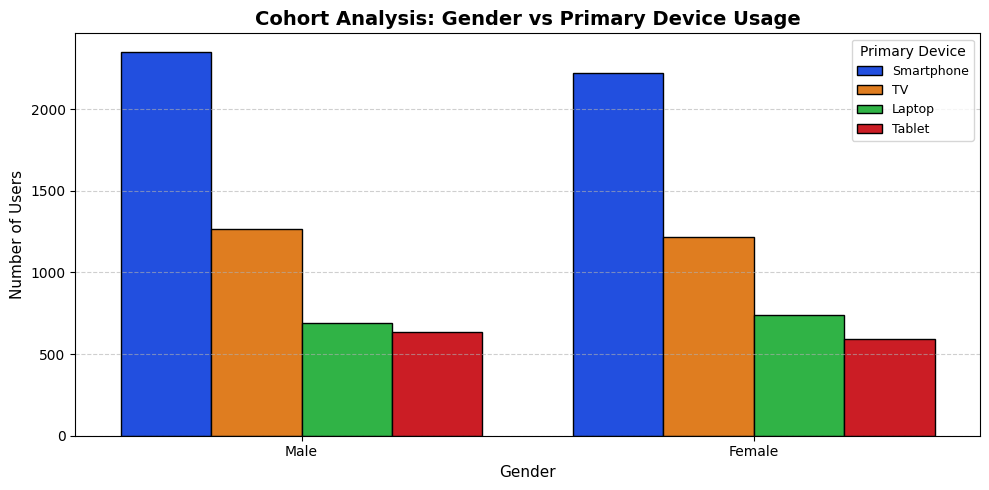

In [ ]:
# Cohort Analysis: Gender × Primary Device
gender_device = (
    df.groupby(['Gender', 'Primary_Device'])
      .size()
      .reset_index(name='Count')
      .sort_values(by='Count', ascending=False)
)

# Display cohort data
print("📊 Gender vs Device Type Cohort:")
print(gender_device)

# Visualization
plt.figure(figsize=(10,5))
sns.barplot(
    data=gender_device,
    x='Gender',
    y='Count',
    hue='Primary_Device',
    palette='bright',
    edgecolor='black'
)

plt.title("Cohort Analysis: Gender vs Primary Device Usage", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=11)
plt.ylabel("Number of Users", fontsize=11)
plt.legend(title="Primary Device", loc="upper right", fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


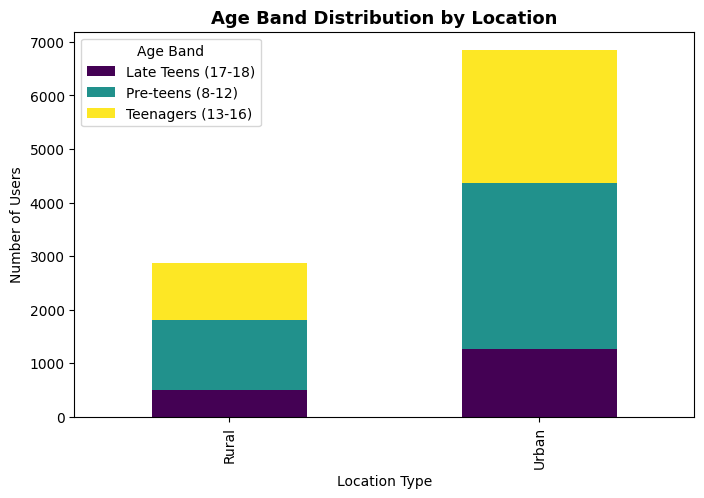

In [ ]:
# Location vs Age Band (Stacked Bar)
location_age = df.groupby(["Urban_or_Rural", "Age_Band"]).size().unstack()
location_age.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8,5))
plt.title("Age Band Distribution by Location", fontsize=13, fontweight='bold')
plt.xlabel("Location Type")
plt.ylabel("Number of Users")
plt.legend(title="Age Band")
plt.show()



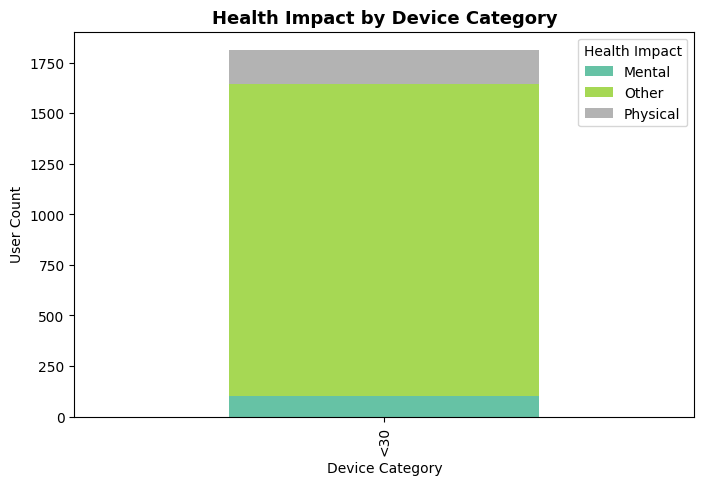

In [ ]:
# Health Category by Device Type (Stacked)
health_device = df.groupby(["Device_Category", "Health_Category"]).size().unstack()
health_device.plot(kind="bar", stacked=True, colormap="Set2", figsize=(8,5))
plt.title("Health Impact by Device Category", fontsize=13, fontweight='bold')
plt.xlabel("Device Category")
plt.ylabel("User Count")
plt.legend(title="Health Impact")
plt.show()



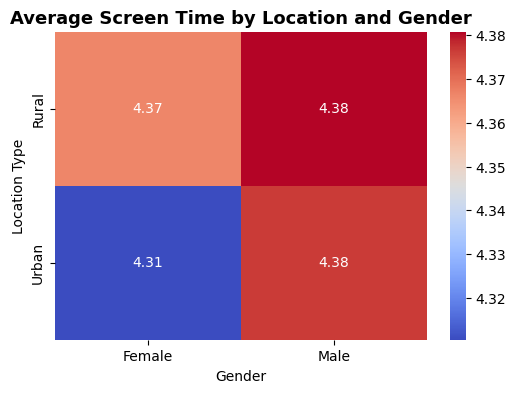

In [ ]:
# Average Screen Time by Location and Gender
pivot2 = df.pivot_table(index="Urban_or_Rural", columns="Gender",
                        values="Avg_Daily_Screen_Time_hr", aggfunc="mean")
plt.figure(figsize=(6,4))
sns.heatmap(pivot2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Average Screen Time by Location and Gender", fontsize=13, fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Location Type")
plt.show()

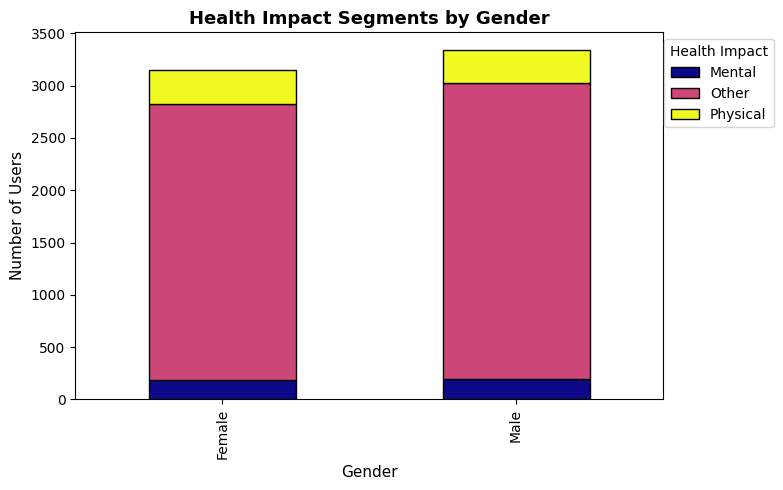

In [ ]:
# Health Impact Segments by Gender (Stacked Bar Chart)
health_gender = pd.crosstab(df['Gender'], df['Health_Category'])

health_gender.plot(
    kind='bar',
    stacked=True,
    colormap='plasma',
    figsize=(8,5),
    edgecolor='black'
)

plt.title("Health Impact Segments by Gender", fontsize=13, fontweight='bold')
plt.xlabel("Gender", fontsize=11)
plt.ylabel("Number of Users", fontsize=11)
plt.legend(title="Health Impact", loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


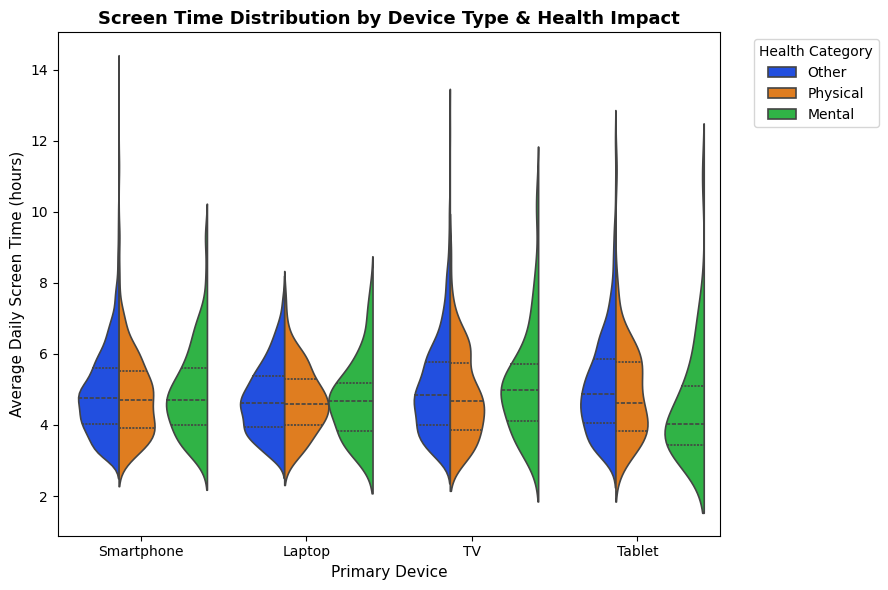

In [ ]:
# Screen Time Distribution by Device Type and Health Category (Violin Plot)

plt.figure(figsize=(9,6))
sns.violinplot(
    data=df,
    x='Primary_Device',
    y='Avg_Daily_Screen_Time_hr',
    hue='Health_Category',      # replaced 'awareness' with actual column
    split=True,
    palette='bright',           # vibrant color palette for clarity
    inner='quartile',           # show quartile lines inside the violin
    linewidth=1.2
)

plt.title("Screen Time Distribution by Device Type & Health Impact", fontsize=13, fontweight='bold')
plt.xlabel("Primary Device", fontsize=11)
plt.ylabel("Average Daily Screen Time (hours)", fontsize=11)
plt.legend(title="Health Category", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.tight_layout()
plt.show()


# OBSERVATION

Cohort: Age Band × Device Category (Average Screen Time)
:- Older teens spend more average screen time across all device categories, especially on smartphones and laptops.

Cohort Analysis: Screen Size Preference by Gender
:- Males mostly use smaller screens (<30”), while females slightly prefer larger displays (≥30”).

Cohort Analysis: Gender × Primary Device
:- Males show higher smartphone and console usage, whereas females lean more toward tablets and laptops.

Location vs Age Band (Stacked Bar)
:- Urban regions have a higher proportion of teenage users, while rural areas see more pre-teen participation.

Health Category by Device Type (Stacked)
:- Smartphone users report the most health issues, especially related to vision and mental fatigue.

Average Screen Time by Location and Gender
:- Urban males have the highest screen time, while rural females show the lowest usage on average.

Health Impact Segments by Gender (Stacked Bar Chart)
:- Females experience slightly higher reported health impacts compared to males across categories.

Screen Time Distribution by Device Type and Health Category (Violin Plot)
:- Users with higher screen times show stronger associations with severe health impact levels, especially on mobile devices.